# Implementing Regression Model with Keras on concrete dataset

Goal is to built the Keras model for regression task and experimenting on several hyperparameter tuning (epochs, loss etc.)

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

### Loading the dataset

In [2]:
# Reading the dataset
df = pd.read_csv('https://cocl.us/concrete_data')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# examining df
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
# Linear Regression using single variable
predictor = df.drop(columns = ['Strength'])
target = df['Strength']
n_cols = predictor.shape[1]

In [6]:
predictor.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

## Part-A
Neural Network design




In [8]:
def regression_model():
  #declare model
  model = Sequential()
  #initialize hidden layer
  model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
  #output layer
  model.add(Dense(1))
  #compiling the model
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

In [9]:
model = regression_model()

In [10]:
mean_sq_error = []
for i in range(1,51):
  X_train,X_test,y_train, y_test = train_test_split(predictor, df['Strength'],test_size = 0.3)
  res = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, verbose = 0)
  mean_squared_error = res.history['val_loss'][-1]
  print('Iteration--->', i, 'mean squared error----->',mean_squared_error )
  mean_sq_error.append(mean_squared_error)

Iteration---> 1 mean squared error-----> 2029.9639892578125
Iteration---> 2 mean squared error-----> 247.26885986328125
Iteration---> 3 mean squared error-----> 143.3780517578125
Iteration---> 4 mean squared error-----> 117.90177154541016
Iteration---> 5 mean squared error-----> 112.30696105957031
Iteration---> 6 mean squared error-----> 99.12007141113281
Iteration---> 7 mean squared error-----> 121.90169525146484
Iteration---> 8 mean squared error-----> 124.8621597290039
Iteration---> 9 mean squared error-----> 121.23070526123047
Iteration---> 10 mean squared error-----> 125.12804412841797
Iteration---> 11 mean squared error-----> 109.51700592041016
Iteration---> 12 mean squared error-----> 126.84500122070312
Iteration---> 13 mean squared error-----> 118.15155029296875
Iteration---> 14 mean squared error-----> 101.07138061523438
Iteration---> 15 mean squared error-----> 99.1369857788086
Iteration---> 16 mean squared error-----> 118.61203002929688
Iteration---> 17 mean squared error---

In [11]:
print('mean of mean squared error:', np.mean(mean_sq_error))
print('standard deviation of mean squared error:', np.std(mean_sq_error))

mean of mean squared error: 128.12347023010253
standard deviation of mean squared error: 274.4551648016829


## Part-B
Apply Normalization

In [12]:
predictor = (predictor-predictor.mean())/predictor.std()
predictor.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [13]:
mean_sq_error = []
for i in range(1,51):
  X_train,X_test,y_train, y_test = train_test_split(predictor, df['Strength'],test_size = 0.3)
  res = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, verbose = 0)
  mean_squared_error = res.history['val_loss'][-1]
  print('Iteration--->', i, 'mean squared error----->',mean_squared_error )
  mean_sq_error.append(mean_squared_error)

Iteration---> 1 mean squared error-----> 475.1897888183594
Iteration---> 2 mean squared error-----> 158.8472442626953
Iteration---> 3 mean squared error-----> 123.64480590820312
Iteration---> 4 mean squared error-----> 87.86418914794922
Iteration---> 5 mean squared error-----> 71.43561553955078
Iteration---> 6 mean squared error-----> 57.53474426269531
Iteration---> 7 mean squared error-----> 55.4117431640625
Iteration---> 8 mean squared error-----> 47.51807403564453
Iteration---> 9 mean squared error-----> 44.63567352294922
Iteration---> 10 mean squared error-----> 42.95283126831055
Iteration---> 11 mean squared error-----> 43.57415771484375
Iteration---> 12 mean squared error-----> 36.46786880493164
Iteration---> 13 mean squared error-----> 41.94459533691406
Iteration---> 14 mean squared error-----> 43.096920013427734
Iteration---> 15 mean squared error-----> 40.961524963378906
Iteration---> 16 mean squared error-----> 37.073638916015625
Iteration---> 17 mean squared error-----> 43.2

In [14]:
print('mean of mean squared error:', np.mean(mean_sq_error))
print('standard deviation of mean squared error:', np.std(mean_sq_error))

mean of mean squared error: 53.62681293487549
standard deviation of mean squared error: 64.17895163381787


## Part-C
Epoch tuning: 100 epochs

In [15]:
mean_sq_error = []
for i in range(1,51):
  X_train,X_test,y_train, y_test = train_test_split(predictor, df['Strength'],test_size = 0.3)
  res = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, verbose = 0)
  mean_squared_error = res.history['val_loss'][-1]
  print('Iteration--->', i, 'mean squared error----->',mean_squared_error )
  mean_sq_error.append(mean_squared_error)

Iteration---> 1 mean squared error-----> 37.523414611816406
Iteration---> 2 mean squared error-----> 33.430137634277344
Iteration---> 3 mean squared error-----> 34.82769012451172
Iteration---> 4 mean squared error-----> 34.43022918701172
Iteration---> 5 mean squared error-----> 36.70095443725586
Iteration---> 6 mean squared error-----> 36.299354553222656
Iteration---> 7 mean squared error-----> 37.29280471801758
Iteration---> 8 mean squared error-----> 34.66727828979492
Iteration---> 9 mean squared error-----> 31.140722274780273
Iteration---> 10 mean squared error-----> 35.21610641479492
Iteration---> 11 mean squared error-----> 32.65126419067383
Iteration---> 12 mean squared error-----> 35.019832611083984
Iteration---> 13 mean squared error-----> 32.199851989746094
Iteration---> 14 mean squared error-----> 29.129638671875
Iteration---> 15 mean squared error-----> 34.35755920410156
Iteration---> 16 mean squared error-----> 28.133399963378906
Iteration---> 17 mean squared error-----> 33

In [16]:
print('mean of mean squared error:', np.mean(mean_sq_error))
print('standard deviation of mean squared error:', np.std(mean_sq_error))

mean of mean squared error: 32.659988975524904
standard deviation of mean squared error: 2.67717011402251


## Part-D
Experiment: 3 hidden layers with 10 nodes and ReLU activations

In [17]:
def regression_model():
  #declare model
  model = Sequential()
  #1st hidden layer
  model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
  #2nd hidden layer
  model.add(Dense(10, activation = 'relu'))
  #3rd hidden layer
  model.add(Dense(10, activation = 'relu'))
  #output layer
  model.add(Dense(1))
  #compiling the model
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

In [18]:
model = regression_model()

In [19]:
mean_sq_error = []
for i in range(1,51):
  X_train,X_test,y_train, y_test = train_test_split(predictor, df['Strength'],test_size = 0.3)
  res = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, verbose = 0)
  mean_squared_error = res.history['val_loss'][-1]
  print('Iteration--->', i, 'mean squared error----->',mean_squared_error )
  mean_sq_error.append(mean_squared_error)

Iteration---> 1 mean squared error-----> 127.19952392578125
Iteration---> 2 mean squared error-----> 109.53594207763672
Iteration---> 3 mean squared error-----> 67.16442108154297
Iteration---> 4 mean squared error-----> 53.31361389160156
Iteration---> 5 mean squared error-----> 48.87458419799805
Iteration---> 6 mean squared error-----> 48.38984680175781
Iteration---> 7 mean squared error-----> 37.6014404296875
Iteration---> 8 mean squared error-----> 35.50272750854492
Iteration---> 9 mean squared error-----> 31.381702423095703
Iteration---> 10 mean squared error-----> 34.98635482788086
Iteration---> 11 mean squared error-----> 35.053489685058594
Iteration---> 12 mean squared error-----> 33.85190963745117
Iteration---> 13 mean squared error-----> 28.996074676513672
Iteration---> 14 mean squared error-----> 31.24498748779297
Iteration---> 15 mean squared error-----> 29.32160186767578
Iteration---> 16 mean squared error-----> 29.086265563964844
Iteration---> 17 mean squared error-----> 26

In [20]:
print('mean of mean squared error:', np.mean(mean_sq_error))
print('standard deviation of mean squared error:', np.std(mean_sq_error))

mean of mean squared error: 32.22521495819092
standard deviation of mean squared error: 19.85090094959509


## Comparing Mean Squared Error in all the 4 parts

Text(0, 0.5, 'Mean Squared Error')

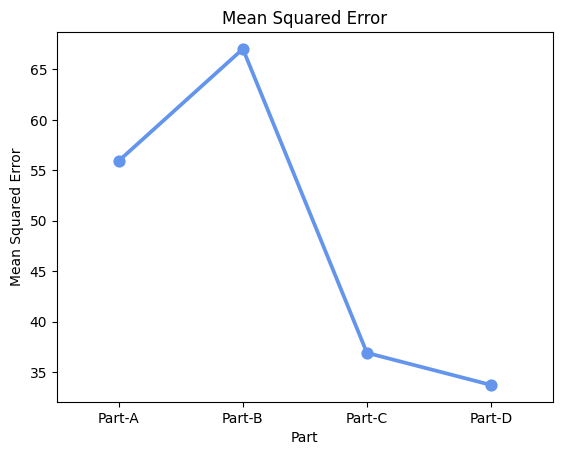

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pointplot(x = ['Part-A', 'Part-B', 'Part-C', 'Part-D'], y = [55.94411376953125,67.02201274871827,36.91457672119141,33.73752418518066], color = '#6495ed').set_title('Mean Squared Error')
plt.xlabel('Part')
plt.ylabel('Mean Squared Error')